## Exploratory Data Analysis 

Now that we have cleaned up our dataset and created new features which we needed, lets now move forward and explore the data we have.

We will do this by utilizing visual methods (maps, charts, graphs, etc) to sumerize the main characteristics of the data we have.

So, lets start exploring.

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy import stats
from scipy.stats import kurtosis
from scipy.stats import skew
from scipy.stats import norm

%matplotlib inline

In [2]:
# Loading our dataset

df_properties = pd.read_csv('cleaned_property_data.csv')
df_properties.head(3)

,id,neighborhood,latitude,longitude,price,size_in_sqft,price_per_sqft,no_of_bedrooms,no_of_bathrooms,quality,...,private_pool,security,shared_gym,shared_pool,shared_spa,study,vastu_compliant,view_of_landmark,view_of_water,walk_in_closet
0,5528049,Palm Jumeirah,25.113208,55.138932,2700000,1079,2502.32,1,2,Medium,...,False,False,True,False,False,False,False,False,True,False
1,6008529,Palm Jumeirah,25.106809,55.151201,2850000,1582,1801.52,2,2,Medium,...,False,False,True,True,False,False,False,False,True,False
2,6034542,Jumeirah Lake Towers,25.063302,55.137728,1150000,1951,589.44,3,5,Medium,...,False,True,True,True,False,False,False,True,True,True


### Examining Property Price

In [3]:
# Price analysis

df_properties.price.describe()

count    1.905000e+03
mean     2.085830e+06
std      2.913200e+06
min      2.200000e+05
25%      8.900000e+05
50%      1.400000e+06
75%      2.200000e+06
max      3.500000e+07
Name: price, dtype: float64

Looking at above descriptive analysis for property pricing in out daraset, we can say that:

- Property prices ranging from AED 220,000 to 35 Millions
- We have 1906 total properties in our dataset
- Mean price of our apartment is little over 2 Million AED

Our price distribution looks like:

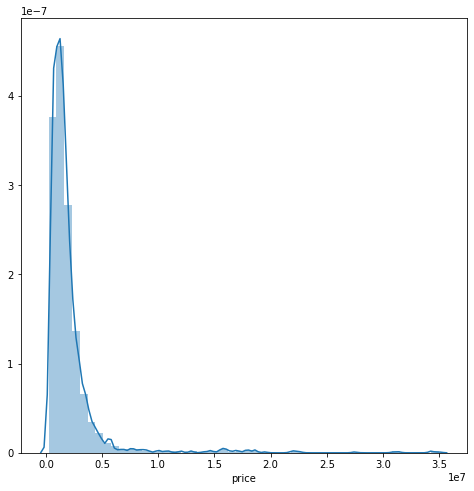

In [4]:
fig, ax = plt.subplots(figsize = (8, 8))

sns.distplot(df_properties.price);

Let's check Skewness and Kurtosis and their impact on our analysis, and ultimately prediction models

In [5]:
print("Skewness: %f" % df_properties.price.skew())
print("Kurtosis: %f" % df_properties.price.kurt())

Skewness: 6.147403
Kurtosis: 48.856572


As we can see that our data is highly skewed and shows a long-tail positive skewness. This uneven distribution is will harm our analysis and prediction model.

Lets split our dataset in to two parts. We can see from above distribution plot that our tail starts at about 5 Million price point. So lets see how many properties we have under 5 Million and how many above?

In [6]:
df_properties_lt5 = df_properties[df_properties.price < 5000001]
df_properties_gt5 = df_properties[df_properties.price > 5000000]

In [7]:
df_properties_lt5.price.describe()

count    1.816000e+03
mean     1.587953e+06
std      9.508697e+05
min      2.200000e+05
25%      8.575000e+05
50%      1.389950e+06
75%      2.043860e+06
max      4.996000e+06
Name: price, dtype: float64

In [8]:
df_properties_gt5.price.describe()

count    8.900000e+01
mean     1.224476e+07
std      7.448623e+06
min      5.045846e+06
25%      5.876888e+06
50%      9.209000e+06
75%      1.620000e+07
max      3.500000e+07
Name: price, dtype: float64

The above findings are intresting.

In our dataset, we have 1817 properties which are under 5 Million, but only 89 properties are priced at 5 Million to 35 Million.

As said before, this drastice variance will hurt our model, as we could get a property from the tail section dominating our training dataset with its 35 million price.

Now, we have option. We either perform a LOG conversion and handle our data, or we can merely eliminate the 89 outliers which are tainting our dataset.

Let's go with easy one and just eliminate the 89 properties, as we still have substantial number of properties still left in our dataset.

In [9]:
df_properties = df_properties[df_properties.price < 5000001]

Let's plot the distribution plot again and see the impact

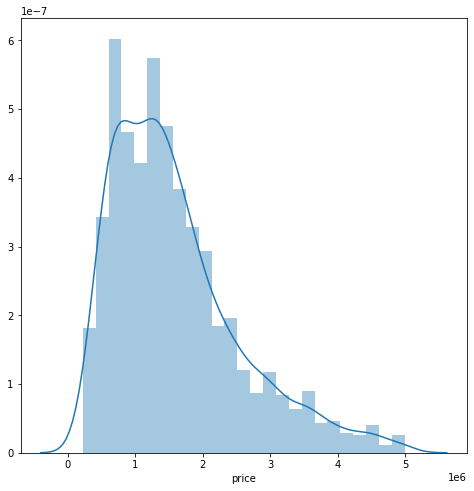

In [10]:
fig, ax = plt.subplots(figsize = (8, 8))

sns.distplot(df_properties.price)

Let's check Skewness and Kurtosis

In [11]:
print("Skewness: %f" % df_properties.price.skew())
print("Kurtosis: %f" % df_properties.price.kurt())

Skewness: 1.141478
Kurtosis: 1.067956


Although our skewness is still above 1, it is in much better state than earlier skewness of 6+

Let's move forward and see relationship of price against other features associated with property.

### Price vs Location

Let's see the impact of apartment pricing based on different neighborhoods in Dubai. 

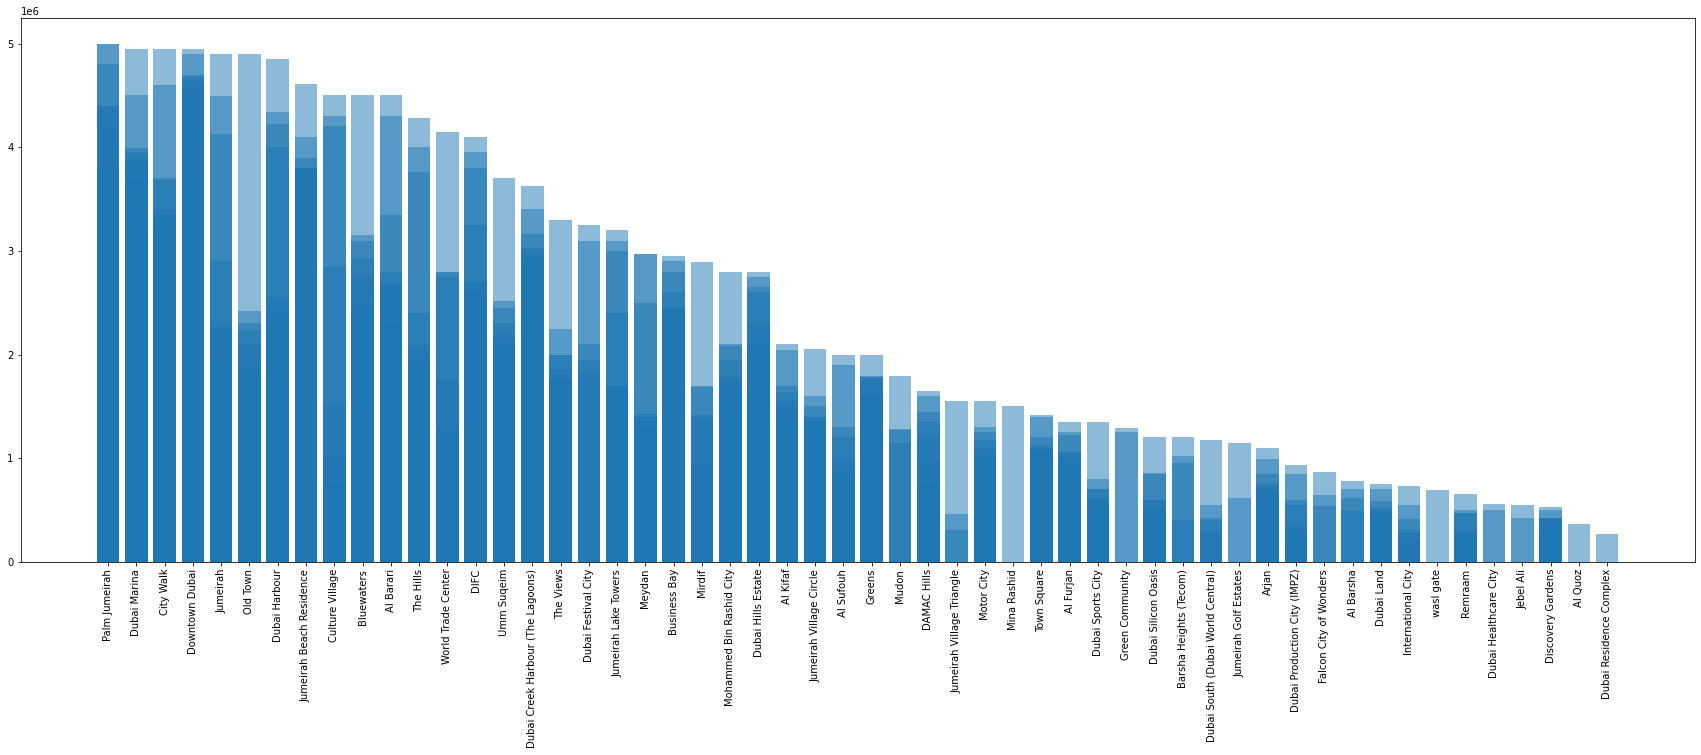

In [12]:
df_neighborhood_price = df_properties[['price', 'neighborhood']].sort_values(by=['price'], ascending = False)

plt.figure(figsize = (30, 10))
plt.bar(df_neighborhood_price.neighborhood, df_neighborhood_price.price, align='center', alpha=0.5)
plt.xticks(rotation='vertical')
plt.show()

### Price per Sqft vs Location

Let's see most expensive areas in Dubai based on price per square footage. 

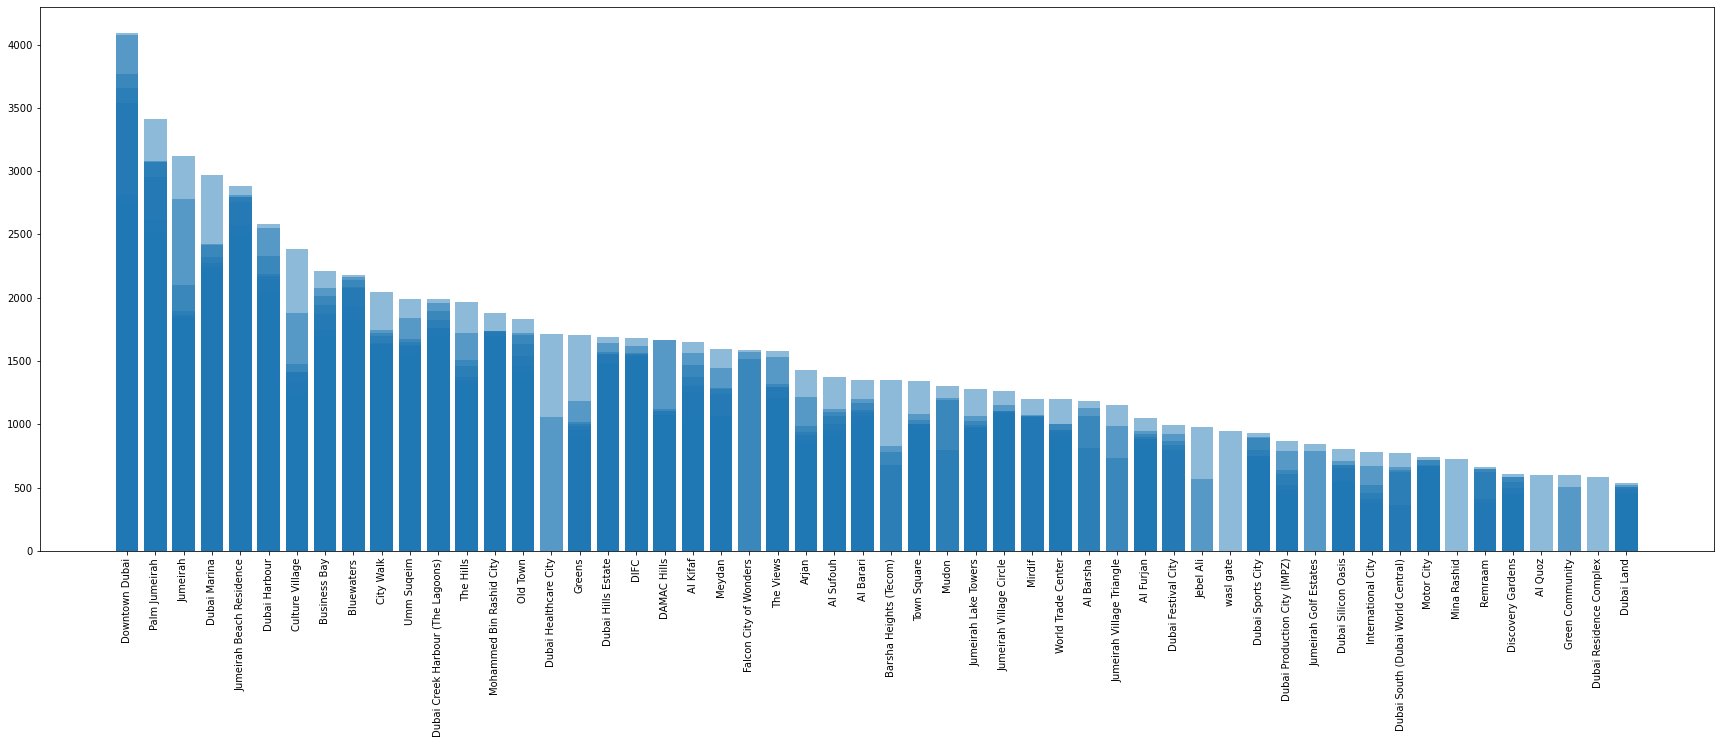

In [13]:
df_neighborhood_price = df_properties[['price_per_sqft', 'neighborhood']].sort_values(by=['price_per_sqft'], ascending = False)

plt.figure(figsize = (30, 10))
plt.bar(df_neighborhood_price.neighborhood, df_neighborhood_price.price_per_sqft, align='center', alpha=0.5)
plt.xticks(rotation='vertical')
plt.show()

### Price vs Area

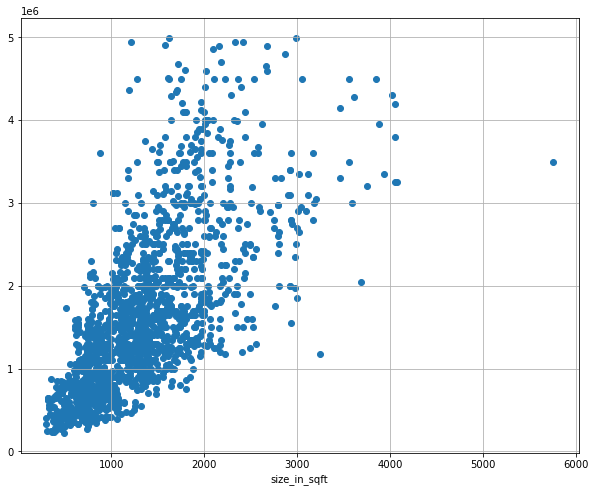

In [44]:
#scatter plot grlivarea/saleprice
plt.figure(figsize = (10, 8))

feature = 'size_in_sqft'
plt.scatter(df_properties[feature], df_properties['price'])
plt.xlabel('size_in_sqft')
plt.grid(True)

We can see a clear relationship of price with area of the property. Higher the price, more the area.

### Price vs Number of Bedrooms

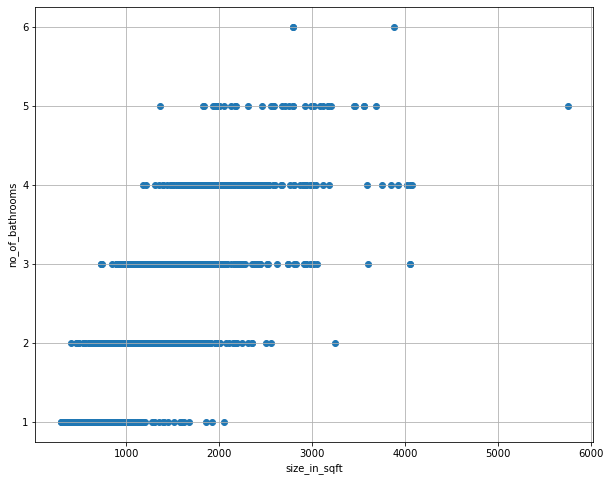

In [42]:
plt.figure(figsize = (10, 8))

plt.scatter(df_properties['size_in_sqft'], df_properties['no_of_bathrooms'])
plt.xlabel('size_in_sqft')
plt.ylabel('no_of_bathrooms')
plt.grid(True)

This is very intresting. We can see that:

- We have 1 bedroom apartments ranging upto 5 million, most probably because of the locality.
- We have 2 bedrooms apartments ranging from sub 1 million to upto 5 million.
- We have 3 bedrooms apartments ranging from 1 million to up 5 million.

### Bedrooms vs Bathrooms

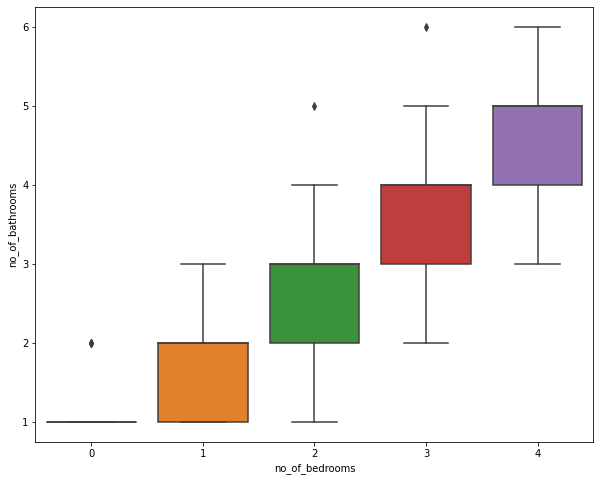

In [37]:
plt.figure(figsize = (10, 8))
sns.boxplot(x="no_of_bedrooms", y="no_of_bathrooms", data = df_properties)
plt.show()

Well this is obvious:

- 0 bedroom units, i.e. studio apartment; will always have 1 bathroom
- 1 bedroom apartment have 1 to 2 bathrooms
- 2 bedrooms apartment have 2 to 3 bathrooms
- 3 bedrooms apartment have 3 to 4 bathrooms
- 4 bedrooms apartment have 4 to 5 bathrooms

There are few cases in studio, 2 bedroom, and 3 bedroom units having more bathrooms, as depicted by outliers.

### Overall Correlation

Let's examine the overall correlation of of features in our dataset

In [38]:
df_properties_corr = df_properties.copy()
df_properties_corr.drop(['id', 'latitude', 'longitude'], axis=1, inplace=True)

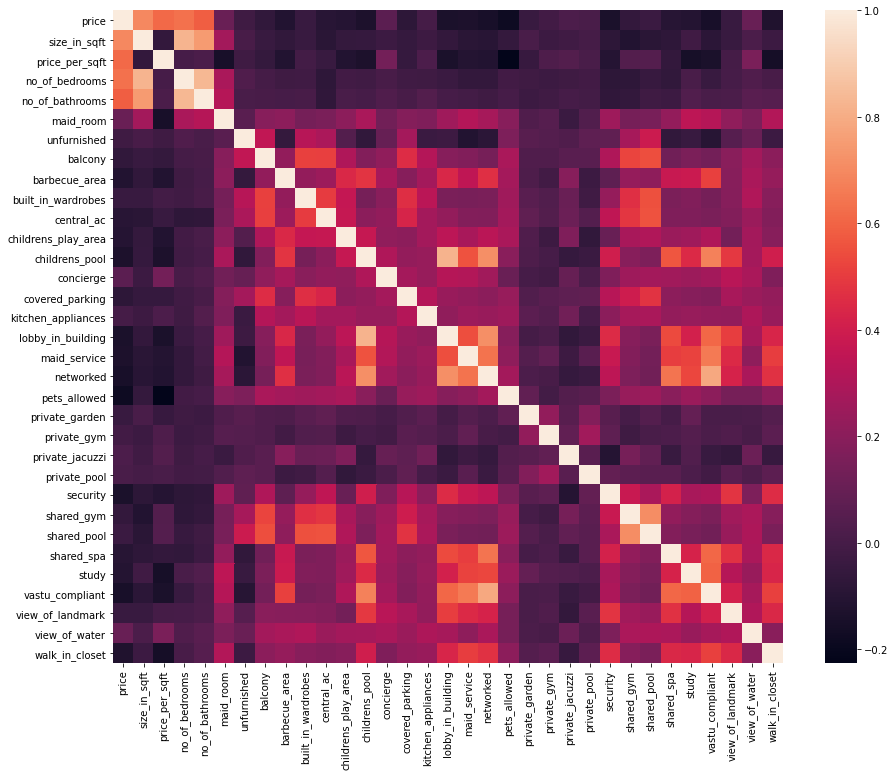

In [39]:
fig, ax = plt.subplots(figsize=(15, 12))

corr_matrix = df_properties_corr.corr()
sns.heatmap(corr_matrix, annot = False)
plt.show()

### Property Map

Let's visualize our properties on Dubai map and see which areas has more properties available and have higher prices 

In [19]:
from geopy.geocoders import Nominatim
import folium
from folium.plugins import HeatMap

address = 'Dubai, United Arab Emirates'
geolocator = Nominatim(user_agent="data_regress_project")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

data = df_properties[['latitude', 'longitude', 'price']].values

# create map of Dubai using latitude and longitude values
map_dubai_re = folium.Map(location = [latitude, longitude], control_scale=True, zoom_start = 12)

# add markers to map
for lat, lng, neighborhood in zip(df_properties['latitude'], df_properties['longitude'], df_properties['neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius = 2,
        popup=label,
        color='b',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=1,
        parse_html=False).add_to(map_dubai_re)  
    
radius = 15
hm = HeatMap(
    data,
    radius=radius,
    blur=30
)
hm.add_to(map_dubai_re)
    
map_dubai_re